##**Premier Dataset Loan.csv**

In [ ]:
import kagglehub

path = kagglehub.dataset_download("adarshsng/lending-club-loan-data-csv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'lending-club-loan-data-csv' dataset.
Path to dataset files: /kaggle/input/lending-club-loan-data-csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/adarshsng/lending-club-loan-data-csv/versions/1/loan.csv", low_memory=False)

In [ ]:
keep_cols = [
    'loan_status',
    'annual_inc',
    'dti',
    'loan_amnt',
    'term',
    'revol_util',
    'delinq_2yrs',
    'open_acc',
    'total_acc',
    'home_ownership',
    'emp_length'
]



df_test_raw = df[keep_cols]

In [ ]:
df_test_raw

In [ ]:
df_test = df[keep_cols].copy()



In [ ]:
num_cols = [
    'annual_inc',
    'dti',
    'loan_amnt',
    'revol_util',
    'delinq_2yrs',
    'open_acc',
    'total_acc'
]

for col in num_cols:
    df_test[col] = df_test[col].fillna(df_test[col].median())
cat_cols = ['term', 'home_ownership', 'emp_length']

for col in cat_cols:
    df_test[col] = df_test[col].fillna('Unknown')


df_test = df_test.sample(
    n=5000,        # 3000–7000 idéal
    random_state=42
)
df_test['term'] = df_test['term'].str.extract('(\d+)')

df_test['emp_length'] = df_test['emp_length'].replace({
    '3 year': '3 years'
})

df_pc = df_test[df_test['loan_status'] != 'Current'].copy()


<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-356761672.py:23: SyntaxWarning: invalid escape sequence '\d'
  df_test['term'] = df_test['term'].str.extract('(\d+)')


In [ ]:
df_test

,loan_status,annual_inc,dti,loan_amnt,term,revol_util,delinq_2yrs,open_acc,total_acc,home_ownership,emp_length
1758049,Fully Paid,90000.0,3.51,35000,36,8.1,0.0,14.0,22.0,RENT,< 1 year
686533,Current,100000.0,22.85,30000,60,52.7,0.0,17.0,25.0,RENT,2 years
900721,Fully Paid,100000.0,6.71,15000,36,10.3,0.0,16.0,25.0,OWN,5 years
1727912,Fully Paid,58000.0,15.50,24000,60,72.2,0.0,10.0,15.0,RENT,5 years
539691,Current,90000.0,19.88,14400,36,49.9,0.0,19.0,48.0,MORTGAGE,3 years
...,...,...,...,...,...,...,...,...,...,...,...
1065550,Fully Paid,56000.0,25.57,4200,36,39.9,1.0,10.0,28.0,MORTGAGE,10+ years
887663,Charged Off,65000.0,16.62,12000,36,68.1,1.0,11.0,19.0,MORTGAGE,6 years
1716133,Fully Paid,85000.0,31.96,7000,36,76.0,0.0,13.0,26.0,MORTGAGE,10+ years
717436,Current,69000.0,28.31,12150,60,76.7,0.0,14.0,15.0,MORTGAGE,10+ years


In [ ]:
pip install pgmpy
!apt-get update
!apt-get install -y graphviz graphviz-dev
!pip install pygraphviz


**PC algorithm**

In [ ]:


from pgmpy.estimators import PC

model_pc = PC(data=df_test).estimate(
    ci_test='pillai',
    significance_level=0.05,
    max_cond_vars=3,     # important pour la complexité
    return_type='cpdag',
    n_jobs=-1
)

model_pc.to_graphviz().draw('adult_pillai.png', prog='dot')

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df_pc = df_test[df_test['loan_status'] != 'Current'].copy()


In [ ]:
df_pc

,loan_status,annual_inc,dti,loan_amnt,term,revol_util,delinq_2yrs,open_acc,total_acc,home_ownership,emp_length
1758049,Fully Paid,90000.0,3.51,35000,36,8.1,0.0,14.0,22.0,RENT,< 1 year
900721,Fully Paid,100000.0,6.71,15000,36,10.3,0.0,16.0,25.0,OWN,5 years
1727912,Fully Paid,58000.0,15.50,24000,60,72.2,0.0,10.0,15.0,RENT,5 years
2153213,Fully Paid,46750.0,11.09,5000,36,13.2,0.0,8.0,11.0,RENT,< 1 year
1360732,Fully Paid,42000.0,18.71,6550,36,60.9,0.0,3.0,8.0,MORTGAGE,9 years
...,...,...,...,...,...,...,...,...,...,...,...
1768389,Charged Off,75000.0,27.49,25000,60,91.3,0.0,14.0,44.0,RENT,10+ years
1298217,Fully Paid,55000.0,2.18,3000,36,32.3,1.0,9.0,20.0,RENT,1 year
1065550,Fully Paid,56000.0,25.57,4200,36,39.9,1.0,10.0,28.0,MORTGAGE,10+ years
887663,Charged Off,65000.0,16.62,12000,36,68.1,1.0,11.0,19.0,MORTGAGE,6 years


In [ ]:
from pgmpy.estimators import PC

model_pc = PC(data=df_pc).estimate(
    ci_test='pillai',
    significance_level=0.05,
    max_cond_vars=3,     # important pour la complexité
    return_type='cpdag',
    n_jobs=-1
)

model_pc.to_graphviz().draw('adult_pillai_NoCurrent.png', prog='dot')

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df_test['loan_status'].value_counts()


,count
loan_status,
Fully Paid,2345
Current,1997
Charged Off,559
Late (31-120 days),55
In Grace Period,23
Late (16-30 days),14
Does not meet the credit policy. Status:Fully Paid,4
Does not meet the credit policy. Status:Charged Off,3


In [ ]:
def map_status(x):
    if x == 'Charged Off' or 'Charged Off' in x:
        return 'Bad'
    elif x == 'Fully Paid' or 'Fully Paid' in x:
        return 'Good'
    else:
        return 'Other'

df_pc['loan_status_bin'] = df_test['loan_status'].apply(map_status)


In [ ]:
df_pc

,annual_inc,dti,loan_amnt,term,revol_util,delinq_2yrs,open_acc,total_acc,home_ownership,emp_length,loan_status_bin
1758049,90000.0,3.51,35000,36,8.1,0.0,14.0,22.0,RENT,< 1 year,Good
686533,100000.0,22.85,30000,60,52.7,0.0,17.0,25.0,RENT,2 years,Other
900721,100000.0,6.71,15000,36,10.3,0.0,16.0,25.0,OWN,5 years,Good
1727912,58000.0,15.50,24000,60,72.2,0.0,10.0,15.0,RENT,5 years,Good
539691,90000.0,19.88,14400,36,49.9,0.0,19.0,48.0,MORTGAGE,3 years,Other
...,...,...,...,...,...,...,...,...,...,...,...
1065550,56000.0,25.57,4200,36,39.9,1.0,10.0,28.0,MORTGAGE,10+ years,Good
887663,65000.0,16.62,12000,36,68.1,1.0,11.0,19.0,MORTGAGE,6 years,Bad
1716133,85000.0,31.96,7000,36,76.0,0.0,13.0,26.0,MORTGAGE,10+ years,Good
717436,69000.0,28.31,12150,60,76.7,0.0,14.0,15.0,MORTGAGE,10+ years,Other


In [ ]:
df_pc = df_pc[df_pc['loan_status_bin'] != 'Other']


In [ ]:
df_pc


,annual_inc,dti,loan_amnt,term,revol_util,delinq_2yrs,open_acc,total_acc,home_ownership,emp_length,loan_status_bin
1758049,90000.0,3.51,35000,36,8.1,0.0,14.0,22.0,RENT,< 1 year,Good
900721,100000.0,6.71,15000,36,10.3,0.0,16.0,25.0,OWN,5 years,Good
1727912,58000.0,15.50,24000,60,72.2,0.0,10.0,15.0,RENT,5 years,Good
2153213,46750.0,11.09,5000,36,13.2,0.0,8.0,11.0,RENT,< 1 year,Good
1360732,42000.0,18.71,6550,36,60.9,0.0,3.0,8.0,MORTGAGE,9 years,Good
...,...,...,...,...,...,...,...,...,...,...,...
1768389,75000.0,27.49,25000,60,91.3,0.0,14.0,44.0,RENT,10+ years,Bad
1298217,55000.0,2.18,3000,36,32.3,1.0,9.0,20.0,RENT,1 year,Good
1065550,56000.0,25.57,4200,36,39.9,1.0,10.0,28.0,MORTGAGE,10+ years,Good
887663,65000.0,16.62,12000,36,68.1,1.0,11.0,19.0,MORTGAGE,6 years,Bad


In [ ]:
from pgmpy.estimators import PC

model_pc = PC(data=df_pc).estimate(
    ci_test='pillai',
    significance_level=0.05,
    max_cond_vars=3,     # important pour la complexité
    return_type='cpdag',
    n_jobs=-1
)

model_pc.to_graphviz().draw('loan_pillai_3.png', prog='dot')

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
from pgmpy.estimators import PC

model_pc = PC(data=df_pc).estimate(
    ci_test='pillai',
    significance_level=0.1,
    max_cond_vars=3,     # important pour la complexité
    return_type='cpdag',
    n_jobs=-1
)

model_pc.to_graphviz().draw('loan_pillai_3.png', prog='dot')

  0%|          | 0/5 [00:00<?, ?it/s]

**HC algorithm**


In [ ]:
import pandas as pd

df_hc = df_pc.copy()

cont_cols = [
    'annual_inc',
    'dti',
    'loan_amnt',
    'revol_util',
    'open_acc',
    'total_acc'
]

for col in cont_cols:
    df_hc[col] = pd.qcut(
        df_hc[col],
        q=4,                 # 4 bins = bon compromis
        labels=False,
        duplicates='drop'
    )
df_hc['delinq_2yrs'] = df_hc['delinq_2yrs'].astype(int)


In [ ]:
from pgmpy.estimators import HillClimbSearch, BIC

# df_hc = ton dataframe discret (int/object) sans NaN
hc = HillClimbSearch(df_hc)



model_hc = hc.estimate(
    scoring_method=BIC(df_hc)
)


model_hc.to_graphviz().draw('loan_hc_bic.png', prog='dot')


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
df_test2 = df[keep_cols].copy()


In [ ]:
df_test2

,loan_status,annual_inc,dti,loan_amnt,term,revol_util,delinq_2yrs,open_acc,total_acc,home_ownership,emp_length
0,Current,55000.0,18.24,2500,36 months,10.3,0.0,9.0,34.0,RENT,10+ years
1,Current,90000.0,26.52,30000,60 months,24.2,0.0,13.0,44.0,MORTGAGE,10+ years
2,Current,59280.0,10.51,5000,36 months,19.1,0.0,8.0,13.0,MORTGAGE,6 years
3,Current,92000.0,16.74,4000,36 months,78.1,0.0,10.0,13.0,MORTGAGE,10+ years
4,Current,57250.0,26.35,30000,60 months,3.6,0.0,12.0,26.0,MORTGAGE,10+ years
...,...,...,...,...,...,...,...,...,...,...,...
2260663,Current,58000.0,20.88,12000,60 months,39.2,0.0,12.0,34.0,MORTGAGE,10+ years
2260664,Fully Paid,30000.0,19.28,12000,60 months,20.2,3.0,10.0,26.0,MORTGAGE,< 1 year
2260665,Current,64000.0,12.96,10000,36 months,70.9,0.0,6.0,13.0,OWN,10+ years
2260666,Current,60000.0,30.82,12000,60 months,34.9,2.0,8.0,17.0,RENT,NaN


In [ ]:
num_cols = [
    'annual_inc',
    'dti',
    'loan_amnt',
    'revol_util',
    'delinq_2yrs',
    'open_acc',
    'total_acc'
]

for col in num_cols:
    df_test2[col] = df_test2[col].fillna(df_test2[col].median())
cat_cols = ['term', 'home_ownership', 'emp_length']

for col in cat_cols:
    df_test2[col] = df_test2[col].fillna('Unknown')


df_test2 = df_test2.sample(
    n=20000,        # 3000–7000 idéal
    random_state=42
)
df_test2['term'] = df_test2['term'].str.extract('(\d+)')

df_test2['emp_length'] = df_test2['emp_length'].replace({
    '3 year': '3 years'
})

df_hc2 = df_test2[df_test2['loan_status'] != 'Current'].copy()

df_hc2 = df_test2[df_test2['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

df_hc2['term'] = df_hc2['term'].astype(str).str.extract(r'(\d+)')
df_hc2 = df_hc2.dropna(subset=['term'])   # sécurité

# import pandas as pd


# cont_cols = [
#     'annual_inc',
#     'dti',
#     'loan_amnt',
#     'revol_util',
#     'open_acc',
#     'total_acc'
# ]

# for col in cont_cols:
#     df_hc2[col] = pd.qcut(
#         df_hc2[col],
#         q=4,                 # 4 bins = bon compromis
#         labels=False,
#         duplicates='drop'
#     )
# df_hc2['delinq_2yrs'] = df_hc2['delinq_2yrs'].astype(int)


<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-436861431.py:23: SyntaxWarning: invalid escape sequence '\d'
  df_test2['term'] = df_test2['term'].str.extract('(\d+)')


In [ ]:
df_hc2.isna().sum()


,0
loan_status,0
annual_inc,0
dti,0
loan_amnt,0
term,0
revol_util,0
delinq_2yrs,0
open_acc,0
total_acc,0
home_ownership,0


In [ ]:
df_hc2

,loan_status,annual_inc,dti,loan_amnt,term,revol_util,delinq_2yrs,open_acc,total_acc,home_ownership,emp_length
1758049,Fully Paid,90000.0,3.51,35000,36,8.1,0.0,14.0,22.0,RENT,< 1 year
900721,Fully Paid,100000.0,6.71,15000,36,10.3,0.0,16.0,25.0,OWN,5 years
1727912,Fully Paid,58000.0,15.50,24000,60,72.2,0.0,10.0,15.0,RENT,5 years
2153213,Fully Paid,46750.0,11.09,5000,36,13.2,0.0,8.0,11.0,RENT,< 1 year
1360732,Fully Paid,42000.0,18.71,6550,36,60.9,0.0,3.0,8.0,MORTGAGE,9 years
...,...,...,...,...,...,...,...,...,...,...,...
1173631,Fully Paid,108000.0,7.73,22600,60,20.9,0.0,10.0,40.0,RENT,< 1 year
1729734,Fully Paid,120000.0,10.02,30000,60,68.0,0.0,11.0,27.0,MORTGAGE,8 years
2113210,Charged Off,95000.0,7.83,35000,60,51.1,0.0,9.0,36.0,MORTGAGE,8 years
563929,Fully Paid,29000.0,20.07,3500,36,30.0,0.0,15.0,37.0,MORTGAGE,5 years


In [ ]:
from pgmpy.estimators import PC

model_pc = PC(data=df_pc).estimate(
    ci_test='pillai',
    significance_level=0.05,
    max_cond_vars=3,     # important pour la complexité
    return_type='cpdag',
    n_jobs=-1
)

model_pc.to_graphviz().draw('PC_10K.png', prog='dot')

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
import pandas as pd


cont_cols = [
    'annual_inc',
    'dti',
    'loan_amnt',
    'revol_util',
    'open_acc',
    'total_acc'
]

for col in cont_cols:
    df_hc2[col] = pd.qcut(
        df_hc2[col],
        q=4,                 # 4 bins = bon compromis
        labels=False,
        duplicates='drop'
    )
df_hc2['delinq_2yrs'] = df_hc2['delinq_2yrs'].astype(int)

In [ ]:
from pgmpy.estimators import HillClimbSearch, BIC

# df_hc = ton dataframe discret (int/object) sans NaN
hc = HillClimbSearch(df_hc2)



model_hc = hc.estimate(
    scoring_method=BIC(df_hc2)
)


model_hc.to_graphviz().draw('loan_hc_bic10k.png', prog='dot')

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
from pgmpy.estimators import HillClimbSearch

from pgmpy.estimators import AIC

hc = HillClimbSearch(df_hc2)


model_hc_aic = hc.estimate(
    scoring_method=AIC(df_hc2),
    max_indegree=3,
)

list(model_hc_aic.edges())
model_hc_aic.to_graphviz().draw('loan_hc_aic10k.png', prog='dot')


  0%|          | 0/1000000 [00:00<?, ?it/s]

## **Second DATASET GiveMeSomeCredit**

In [ ]:
!wget https://raw.githubusercontent.com/Anisito9/Projet3A/refs/heads/main/cs-training.csv





--2026-01-11 17:56:32--  https://raw.githubusercontent.com/Anisito9/Projet3A/refs/heads/main/cs-training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7564965 (7.2M) [text/plain]
Saving to: ‘cs-training.csv’

cs-training.csv     100%[===================>]   7.21M  37.9MB/s    in 0.2s    

2026-01-11 17:56:32 (37.9 MB/s) - ‘cs-training.csv’ saved [7564965/7564965]



In [ ]:
import pandas as pd

df = pd.read_csv("cs-training.csv")

In [ ]:
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [ ]:
df.isna().sum()


,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [ ]:
import pandas as pd

df_clean = df.drop(columns=['Unnamed: 0'])

cols_zero_as_na = ['MonthlyIncome', 'NumberOfDependents']

for col in cols_zero_as_na:
    median_val = df_clean.loc[df_clean[col] != 0, col].median()
    df_clean.loc[df_clean[col] == 0, col] = median_val

df_pc = df_clean.sample(n=20000, random_state=42).copy()

print(df_pc.isna().sum())
print(df_pc.shape)


SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           4034
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       504
dtype: int64
(20000, 11)


In [ ]:
df_pc

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
59770,0,0.029690,57,0,0.283244,10121.0,7,0,1,0,2.0
21362,0,0.000000,57,0,0.142562,7750.0,9,0,1,0,2.0
127324,0,0.036569,48,0,0.236294,6000.0,6,0,2,0,3.0
140509,0,1.018331,41,0,0.163138,4958.0,4,0,0,0,2.0
144297,0,1.008799,49,0,3942.000000,NaN,10,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
103406,0,0.010956,70,0,0.268610,2229.0,9,0,1,0,2.0
43506,0,0.391690,60,0,0.476960,12000.0,9,0,2,0,1.0
61941,0,0.212840,76,0,0.299925,4000.0,10,0,1,0,2.0
22268,0,0.017905,50,0,526.000000,NaN,5,0,0,0,2.0


In [ ]:
df_pc['SeriousDlqin2yrs'].isna().sum(), df_pc['SeriousDlqin2yrs'].value_counts(dropna=False).head(10)


(np.int64(0),
 SeriousDlqin2yrs
 0    18700
 1     1300
 Name: count, dtype: int64)

In [ ]:
import numpy as np

df_pc = df_pc.replace([np.inf, -np.inf], np.nan)


In [ ]:
median_income = df_pc['MonthlyIncome'].median()
df_pc['MonthlyIncome'] = df_pc['MonthlyIncome'].fillna(median_income)
df_pc.loc[df_pc['MonthlyIncome'] == 0, 'MonthlyIncome'] = median_income



median_dep = df_pc['NumberOfDependents'].median()
df_pc['NumberOfDependents'] = df_pc['NumberOfDependents'].fillna(median_dep)
df_pc.loc[df_pc['NumberOfDependents'] == 0, 'NumberOfDependents'] = median_dep

import numpy as np

df_pc = df_pc.replace([np.inf, -np.inf], np.nan)
df_pc = df_pc.dropna().copy()

df_pc.isna().sum()



,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


In [ ]:
!pip install pgmpy
!apt-get update
!apt-get install -y graphviz graphviz-dev
!pip install pygraphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 180.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 22.6 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,865 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 http://archive.ubuntu.com/u

**PC algorithm**

In [ ]:
from pgmpy.estimators import PC

model_pc = PC(data=df_pc).estimate(
    ci_test='pillai',
    significance_level=0.05,
    max_cond_vars=3,
    return_type='cpdag',
    n_jobs=-1
)

model_pc.to_graphviz().draw('gmsc_pc.png', prog='dot')


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df_hc = df_pc.copy()

In [ ]:
import pandas as pd

df_hc = df_pc.copy()

cont_cols = [
    'RevolvingUtilizationOfUnsecuredLines',
    'DebtRatio',
    'MonthlyIncome',
    'age',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberRealEstateLoansOrLines',
    'NumberOfDependents'
]

for c in cont_cols:
    df_hc[c] = pd.qcut(df_hc[c], q=4, labels=False, duplicates='drop')



**HC algorithm**

In [ ]:
from pgmpy.estimators import HillClimbSearch, BIC

hc = HillClimbSearch(df_hc)

model_hc = hc.estimate(
    scoring_method=BIC(df_hc),
    max_indegree=3
)

model_hc.to_graphviz().draw('gmsc_hc.png', prog='dot')

  0%|          | 0/1000000 [00:00<?, ?it/s]

### **ONLINE SHOPPERS 3EME DATASET**

In [ ]:
!wget https://raw.githubusercontent.com/Anisito9/Projet3A/refs/heads/main/online_shoppers_intention.csv

--2026-01-13 13:01:06--  https://raw.githubusercontent.com/Anisito9/Projet3A/refs/heads/main/online_shoppers_intention.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1072063 (1.0M) [text/plain]
Saving to: ‘online_shoppers_intention.csv’

online_shoppers_int 100%[===================>]   1.02M  --.-KB/s    in 0.009s  

2026-01-13 13:01:06 (116 MB/s) - ‘online_shoppers_intention.csv’ saved [1072063/1072063]



In [ ]:
import pandas as pd

df3 = pd.read_csv("/content/online_shoppers_intention.csv")

In [ ]:
df3

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df3.isna().sum()


,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [ ]:
!pip install xgboost

**PC algorithm**

In [ ]:
from pgmpy.estimators import PC

model_pc = PC(data=df3).estimate(
    ci_test='pillai',
    significance_level=0.05,
    max_cond_vars=3,
    return_type='cpdag',
    njobs=1
)

model_pc.to_graphviz().draw('online_shoppers_pc.png', prog='dot')




  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
float_cols = df3.select_dtypes(include=['float']).columns
float_cols


Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay'],
      dtype='object')

In [ ]:
import pandas as pd

df_hc = df3.copy()

float_cols = df_hc.select_dtypes(include=['float']).columns

for col in float_cols:
    df_hc[col] = pd.qcut(
        df_hc[col],
        q=4,
        labels=False,
        duplicates='drop'
    )


In [ ]:
# Types
df_hc.dtypes

# Cardinalité (important pour BIC)
df_hc[float_cols].nunique()


,0
Administrative_Duration,3
Informational_Duration,1
ProductRelated_Duration,4
BounceRates,3
ExitRates,4
PageValues,1
SpecialDay,1


**HC algorithm**

In [ ]:
from pgmpy.estimators import HillClimbSearch, BIC

hc = HillClimbSearch(df_hc)

model_hc = hc.estimate(
    scoring_method=BIC(df_hc),
    max_indegree=3
)

model_hc.to_graphviz().draw('online_shoppers_hc_bic.png', prog='dot')


  0%|          | 0/1000000 [00:00<?, ?it/s]

**LiNGAM algorithm**

In [ ]:
!pip -q install lingam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 8.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

cont_cols = [
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

X = df3[cont_cols].copy()

# sécurité
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# standardisation (recommandée)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)


In [ ]:
from lingam import DirectLiNGAM

model = DirectLiNGAM()
model.fit(Xs)

B = model.adjacency_matrix_
B


array([[ 0.        ,  0.12580768,  0.27247525,  0.1660815 , -0.2710378 ,
         0.        , -0.04390746],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.03057655],
       [ 0.        ,  0.31927565,  0.        ,  0.23122571, -0.42948222,
         0.        ,  0.        ],
       [ 0.        , -0.06863315,  0.        ,  0.        ,  0.        ,
        -0.1132389 ,  0.06340834],
       [ 0.        , -0.03564458,  0.        ,  0.90043741,  0.        ,
        -0.06388893,  0.0316285 ],
       [ 0.        ,  0.02894506,  0.        ,  0.        ,  0.        ,
         0.        , -0.06265623],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [ ]:
import numpy as np

threshold = 0.10  # ajuste à 0.05 / 0.15 selon densité
edges = []
for i, src in enumerate(cont_cols):
    for j, dst in enumerate(cont_cols):
        w = B[j, i]  # convention: X = B X + e -> influence src -> dst
        if abs(w) >= threshold:
            edges.append((src, dst, float(w)))

sorted(edges, key=lambda x: -abs(x[2]))[:20]


[('BounceRates', 'ExitRates', 0.90043741467709),
 ('ExitRates', 'ProductRelated_Duration', -0.42948222089220567),
 ('Informational_Duration', 'ProductRelated_Duration', 0.3192756472669522),
 ('ProductRelated_Duration', 'Administrative_Duration', 0.27247525255828986),
 ('ExitRates', 'Administrative_Duration', -0.2710377952376221),
 ('BounceRates', 'ProductRelated_Duration', 0.23122570527742747),
 ('BounceRates', 'Administrative_Duration', 0.16608149537162584),
 ('Informational_Duration', 'Administrative_Duration', 0.12580767648213448),
 ('PageValues', 'BounceRates', -0.1132389004702655)]

In [ ]:
import networkx as nx

G = nx.DiGraph()
for s, t, w in edges:
    G.add_edge(s, t, label=f"{w:.2f}")

nx.nx_agraph.to_agraph(G).draw("online_shoppers_lingam.png", prog="dot")


##** Puissance prédictive **

In [ ]:
import pandas as pd

df3 = pd.read_csv("/content/online_shoppers_intention.csv")

In [ ]:
df3

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

df3 = pd.read_csv("/content/online_shoppers_intention.csv")

target = "Revenue"

mb_pc_raw = ["PageValues", "Month", "Region", "Bounce rates", "productRelated"]


name_map = {
    "Bounce rates": "BounceRates",
    "bounce rates": "BounceRates",
    "productRelated": "ProductRelated",
    "productrelated": "ProductRelated"
}
mb_pc = [name_map.get(c, c) for c in mb_pc_raw]


use_cols = [c for c in mb_pc if c in df3.columns] + [target]
df_mb_pc = df3[use_cols].copy()

# --- H2O ---
h2o.init()
hf_mb = h2o.H2OFrame(df_mb_pc)

# classification
hf_mb[target] = hf_mb[target].asfactor()
x_mb = [c for c in hf_mb.columns if c != target]

# split identique (seed)
train_mb, valid_mb, test_mb = hf_mb.split_frame(ratios=[0.7, 0.15], seed=42)

aml_mb_pc = H2OAutoML(
    max_runtime_secs=300,
    seed=42,
    sort_metric="AUC",
    balance_classes=True,
    include_algos=["GLM", "GBM", "DRF", "XGBoost"],
)

aml_mb_pc.train(x=x_mb, y=target, training_frame=train_mb, validation_frame=valid_mb)

lb_mb = aml_mb_pc.leaderboard
lb_mb.head(20)

# perf du leader sur test
leader_mb = aml_mb_pc.leader
perf_mb = leader_mb.model_performance(test_data=test_mb)

print("Leader algo:", leader_mb.algo)
print("AUC test:", perf_mb.auc())
print("LogLoss test:", perf_mb.logloss())
print("Best Accuracy (max over thresholds):", max(a[1] for a in perf_mb.accuracy()))
print("F1 max:", perf_mb.F1()[0][1])
!pip -q install h2o

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,14 mins 37 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_vgallz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.114 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:42:18.292: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
Leader algo: xgboost
AUC test: 0.9206587529840786
LogLoss test: 0.24187535973893368
Best Accuracy (max over thresholds): 0.8971397139713971
F1 max: 0.6689774696707105


In [ ]:
!pip -q install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 MB 4.8 MB/s eta 0:00:00


In [ ]:


import pandas as pd
import h2o
from h2o.automl import H2OAutoML

df3 = pd.read_csv("/content/online_shoppers_intention.csv")

h2o.init()
hf = h2o.H2OFrame(df3)

target = "Revenue"
hf[target] = hf[target].asfactor()
x = [c for c in hf.columns if c != target]

train, valid, test = hf.split_frame(ratios=[0.7, 0.15], seed=42)

aml = H2OAutoML(
    max_runtime_secs=300,
    seed=42,
    sort_metric="AUC",
    balance_classes=True,


    include_algos=["GLM", "GBM", "DRF","XGBoost"],   # Logistic/GLM, Gradient Boosting, Random Forest

)

aml.train(x=x, y=target, training_frame=train, validation_frame=valid)

lb = aml.leaderboard
lb.head(20)

leader = aml.leader
perf = leader.model_performance(test_data=test)

print("AUC test:", perf.auc())
print("LogLoss test:", perf.logloss())
print("Accuracy test:", perf.accuracy()[0][1])
print("F1 max:", perf.F1()[0][1])


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,20 mins 25 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_vgallz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.014 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:48:07.133: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
AUC test: 0.923085960262411
LogLoss test: 0.2399284358249887
Accuracy test: 0.900990099009901
F1 max: 0.6666666666666666


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,algo,test_accuracy
3,XGBOOST,0.908141
1,GBM,0.905941
0,DRF,0.904290
2,GLM,0.890539


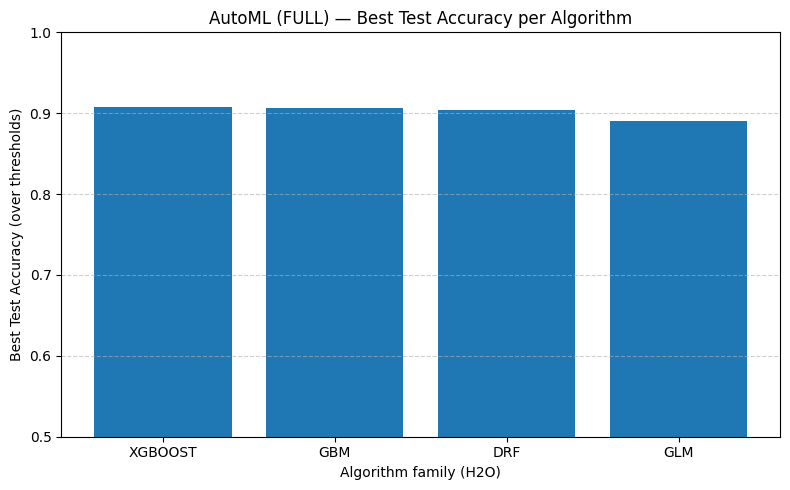

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import h2o

# Accuracy Max
lb_df = aml.leaderboard.as_data_frame()

rows = []
for model_id in lb_df["model_id"]:
    m = h2o.get_model(model_id)
    algo = m.algo  # "glm", "gbm", "drf", "xgboost", "stackedensemble", etc.

    perf_m = m.model_performance(test_data=test)

    acc_list = perf_m.accuracy()
    if acc_list is None or len(acc_list) == 0:
        continue


    best_acc = max(a[1] for a in acc_list)

    rows.append({"algo": algo.upper(), "model_id": model_id, "test_accuracy": best_acc})

per_model_acc = pd.DataFrame(rows)

# Garder le meilleur modèle (accuracy max) par ALGO
best_by_algo = (
    per_model_acc
    .groupby("algo", as_index=False)["test_accuracy"]
    .max()
    .sort_values("test_accuracy", ascending=False)
)

display(best_by_algo)

# Histogramme
plt.figure(figsize=(8, 5))
plt.bar(best_by_algo["algo"], best_by_algo["test_accuracy"])
plt.ylim(0.5, 1.0)
plt.ylabel("Best Test Accuracy (over thresholds)")
plt.xlabel("Algorithm family (H2O)")
plt.title("AutoML (FULL) — Best Test Accuracy per Algorithm")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


##**Markov Boundari PC puissance prédictive**

In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

df3 = pd.read_csv("/content/online_shoppers_intention.csv")

target = "Revenue"


mb_pc_raw = ["PageValues", "Month", "Region", "BounceRates", "ProductRelated"]

# mapping pour coller aux noms réels du dataset
name_map = {
    "Bounce rates": "BounceRates",
    "bounce rates": "BounceRates",
    "productRelated": "ProductRelated",
    "productrelated": "ProductRelated"
}
mb_pc = [name_map.get(c, c) for c in mb_pc_raw]


use_cols = [c for c in mb_pc if c in df3.columns] + [target]
df_mb_pc = df3[use_cols].copy()

h2o.init()
hf_mb = h2o.H2OFrame(df_mb_pc)

hf_mb[target] = hf_mb[target].asfactor()
x_mb = [c for c in hf_mb.columns if c != target]

# split identique (seed)
train_mb, valid_mb, test_mb = hf_mb.split_frame(ratios=[0.7, 0.15], seed=42)

aml_mb_pc = H2OAutoML(
    max_runtime_secs=300,
    seed=42,
    sort_metric="AUC",
    balance_classes=True,
    include_algos=["GLM", "GBM", "DRF", "XGBoost"],
)

aml_mb_pc.train(x=x_mb, y=target, training_frame=train_mb, validation_frame=valid_mb)

# leaderboard
lb_mb = aml_mb_pc.leaderboard
lb_mb.head(20)

# perf du leader sur test
leader_mb = aml_mb_pc.leader
perf_mb = leader_mb.model_performance(test_data=test_mb)

print("Leader algo:", leader_mb.algo)
print("AUC test:", perf_mb.auc())
print("LogLoss test:", perf_mb.logloss())
print("Best Accuracy (max over thresholds):", max(a[1] for a in perf_mb.accuracy()))
print("F1 max:", perf_mb.F1()[0][1])


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,26 mins 07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_vgallz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.973 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:53:48.315: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
Leader algo: xgboost
AUC test: 0.9206587529840786
LogLoss test: 0.24187535973893368
Best Accuracy (max over thresholds): 0.8971397139713971
F1 max: 0.6689774696707105


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,algo,test_accuracy
1,GBM,0.905941
3,XGBOOST,0.903740
0,DRF,0.896040
2,GLM,0.889439


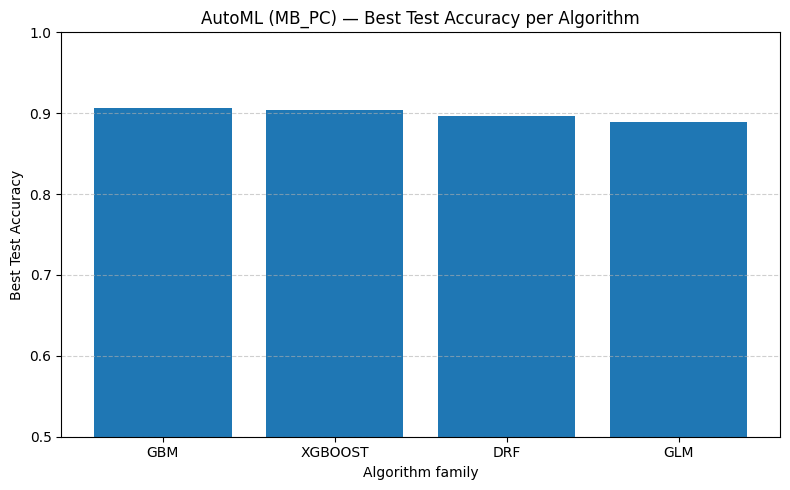

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import h2o

lb_df = aml_mb_pc.leaderboard.as_data_frame()

rows = []
for model_id in lb_df["model_id"]:
    m = h2o.get_model(model_id)
    algo = m.algo
    perf_m = m.model_performance(test_data=test_mb)
    acc_list = perf_m.accuracy()
    if acc_list:
        best_acc = max(a[1] for a in acc_list)
        rows.append({"algo": algo.upper(), "model_id": model_id, "test_accuracy": best_acc})

per_model_acc = pd.DataFrame(rows)
best_by_algo_mb = (
    per_model_acc.groupby("algo", as_index=False)["test_accuracy"]
    .max()
    .sort_values("test_accuracy", ascending=False)
)

display(best_by_algo_mb)

plt.figure(figsize=(8, 5))
plt.bar(best_by_algo_mb["algo"], best_by_algo_mb["test_accuracy"])
plt.ylim(0.5, 1.0)
plt.ylabel("Best Test Accuracy")
plt.xlabel("Algorithm family")
plt.title("AutoML (MB_PC) — Best Test Accuracy per Algorithm")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


##**Markov Boundari HC puissance prédictive**

In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

df3 = pd.read_csv("/content/online_shoppers_intention.csv")

target = "Revenue"

# --- Markov Blanket HC ---
mb_hc = ["ExitRates", "ProductRelated_Duration"]


df_mb_hc = df3[mb_hc + [target]].copy()

h2o.init()
hf_mb_hc = h2o.H2OFrame(df_mb_hc)

hf_mb_hc[target] = hf_mb_hc[target].asfactor()
x_mb_hc = [c for c in hf_mb_hc.columns if c != target]

# split identique
train_mb_hc, valid_mb_hc, test_mb_hc = hf_mb_hc.split_frame(
    ratios=[0.7, 0.15],
    seed=42
)

aml_mb_hc = H2OAutoML(
    max_runtime_secs=300,
    seed=42,
    sort_metric="AUC",
    balance_classes=True,
    include_algos=["GLM", "GBM", "DRF", "XGBoost"],
)

aml_mb_hc.train(
    x=x_mb_hc,
    y=target,
    training_frame=train_mb_hc,
    validation_frame=valid_mb_hc
)

# leaderboard
lb_hc = aml_mb_hc.leaderboard
lb_hc.head(20)

# perf leader
leader_hc = aml_mb_hc.leader
perf_hc = leader_hc.model_performance(test_data=test_mb_hc)

print("Leader algo:", leader_hc.algo)
print("AUC test:", perf_hc.auc())
print("LogLoss test:", perf_hc.logloss())
print("Best Accuracy:", max(a[1] for a in perf_hc.accuracy()))
print("F1 max:", perf_hc.F1()[0][1])


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,32 mins 14 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_vgallz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.931 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:59:54.532: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
Leader algo: xgboost
AUC test: 0.7172902686140716
LogLoss test: 0.40523135684321143
Best Accuracy: 0.8476347634763476
F1 max: 0.3804971319311663


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,algo,test_accuracy
3,XGBOOST,0.852035
1,GBM,0.850385
0,DRF,0.848735
2,GLM,0.847635


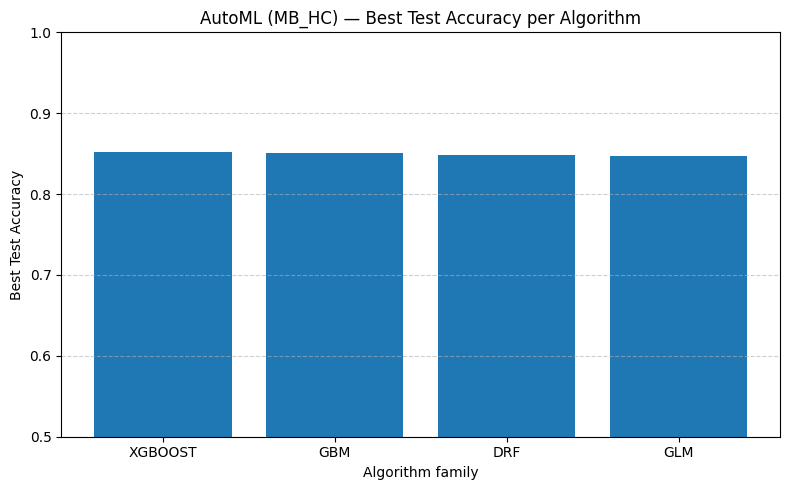

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import h2o

lb_df = aml_mb_hc.leaderboard.as_data_frame()

rows = []
for model_id in lb_df["model_id"]:
    m = h2o.get_model(model_id)
    algo = m.algo
    perf_m = m.model_performance(test_data=test_mb_hc)
    acc_list = perf_m.accuracy()
    if acc_list:
        best_acc = max(a[1] for a in acc_list)
        rows.append({"algo": algo.upper(), "model_id": model_id, "test_accuracy": best_acc})

per_model_acc = pd.DataFrame(rows)

best_by_algo_mb_hc = (
    per_model_acc
    .groupby("algo", as_index=False)["test_accuracy"]
    .max()
    .sort_values("test_accuracy", ascending=False)
)

display(best_by_algo_mb_hc)

plt.figure(figsize=(8, 5))
plt.bar(best_by_algo_mb_hc["algo"], best_by_algo_mb_hc["test_accuracy"])
plt.ylim(0.5, 1.0)
plt.ylabel("Best Test Accuracy")
plt.xlabel("Algorithm family")
plt.title("AutoML (MB_HC) — Best Test Accuracy per Algorithm")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df_full = best_by_algo.copy()
df_full["dataset"] = "FULL"

df_pc = best_by_algo_mb.copy()
df_pc["dataset"] = "MB_PC"

df_hc = best_by_algo_mb_hc.copy()
df_hc["dataset"] = "MB_HC"

results_all = pd.concat([df_full, df_pc, df_hc], ignore_index=True)

display(results_all)


,algo,test_accuracy,dataset
0,XGBOOST,0.908141,FULL
1,GBM,0.905941,FULL
2,DRF,0.904290,FULL
3,GLM,0.890539,FULL
4,GBM,0.905941,MB_PC
5,XGBOOST,0.903740,MB_PC
6,DRF,0.896040,MB_PC
7,GLM,0.889439,MB_PC
8,XGBOOST,0.852035,MB_HC
9,GBM,0.850385,MB_HC


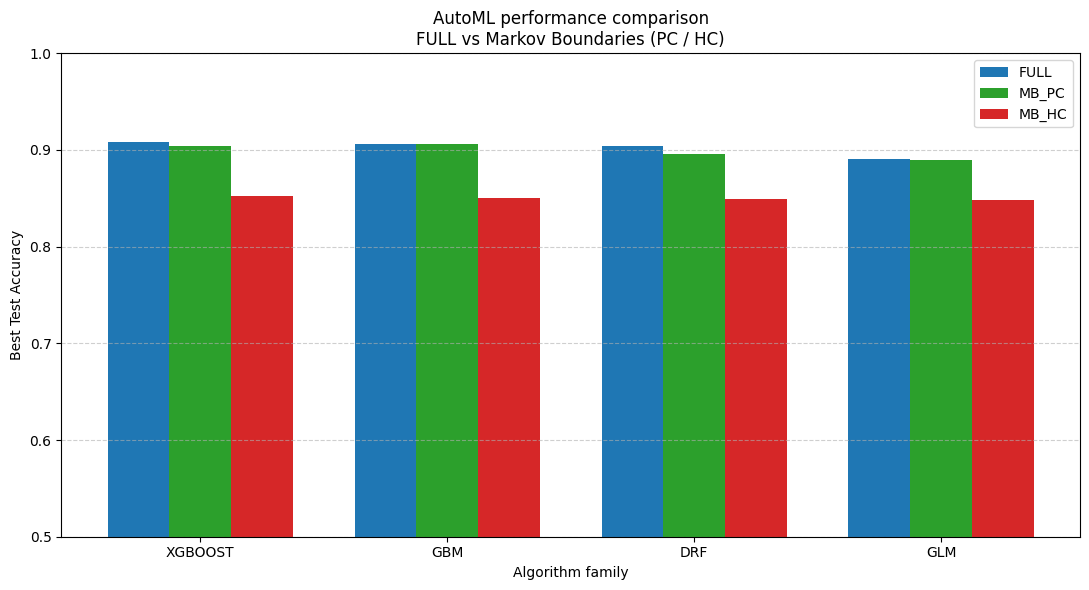

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

algos = results_all["algo"].unique()
datasets = ["FULL", "MB_PC", "MB_HC"]

x = np.arange(len(algos))
width = 0.25

colors = {
    "FULL": "#1f77b4",    # bleu
    "MB_PC": "#2ca02c",   # vert
    "MB_HC": "#d62728"    # rouge
}

plt.figure(figsize=(11, 6))

for i, ds in enumerate(datasets):
    acc = (
        results_all[results_all["dataset"] == ds]
        .set_index("algo")
        .loc[algos]["test_accuracy"]
    )
    plt.bar(
        x + i * width,
        acc,
        width,
        label=ds,
        color=colors[ds]
    )

plt.xticks(x + width, algos)
plt.ylabel("Best Test Accuracy")
plt.xlabel("Algorithm family")
plt.title("AutoML performance comparison\nFULL vs Markov Boundaries (PC / HC)")
plt.ylim(0.5, 1.0)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

# --- Load ---
df3 = pd.read_csv("/content/online_shoppers_intention.csv")
target = "Revenue"

# --- Union des Markov Boundaries ---
mb_union = [
    "PageValues",
    "Month",
    "Region",
    "BounceRates",
    "ProductRelated",
    "ExitRates",
    "ProductRelated_Duration"
]

# sécurité
missing = [c for c in mb_union if c not in df3.columns]
if missing:
    print("⚠️ Colonnes manquantes :", missing)

df_mb_union = df3[mb_union + [target]].copy()

# --- H2O ---
h2o.init()
hf_union = h2o.H2OFrame(df_mb_union)

hf_union[target] = hf_union[target].asfactor()
x_union = [c for c in hf_union.columns if c != target]

# split IDENTIQUE
train_u, valid_u, test_u = hf_union.split_frame(
    ratios=[0.7, 0.15],
    seed=42
)

aml_union = H2OAutoML(
    max_runtime_secs=300,
    seed=42,
    sort_metric="AUC",
    balance_classes=True,
    include_algos=["GLM", "GBM", "DRF", "XGBoost"]
)

aml_union.train(
    x=x_union,
    y=target,
    training_frame=train_u,
    validation_frame=valid_u
)

# perf leader
leader_u = aml_union.leader
perf_u = leader_u.model_performance(test_data=test_u)

print("Leader algo:", leader_u.algo)
print("AUC test:", perf_u.auc())
print("LogLoss test:", perf_u.logloss())
print("Best Accuracy:", max(a[1] for a in perf_u.accuracy()))
print("F1 max:", perf_u.F1()[0][1])


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 24 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_unknownUser_wizzkl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.008 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:43:22.97: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
Leader algo: xgboost
AUC test: 0.9210147277204459
LogLoss test: 0.24071254677210535
Best Accuracy: 0.900990099009901
F1 max: 0.6708661417322834


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,algo,test_accuracy
3,XGBOOST,0.907041
1,GBM,0.904290
0,DRF,0.899890
2,GLM,0.891089


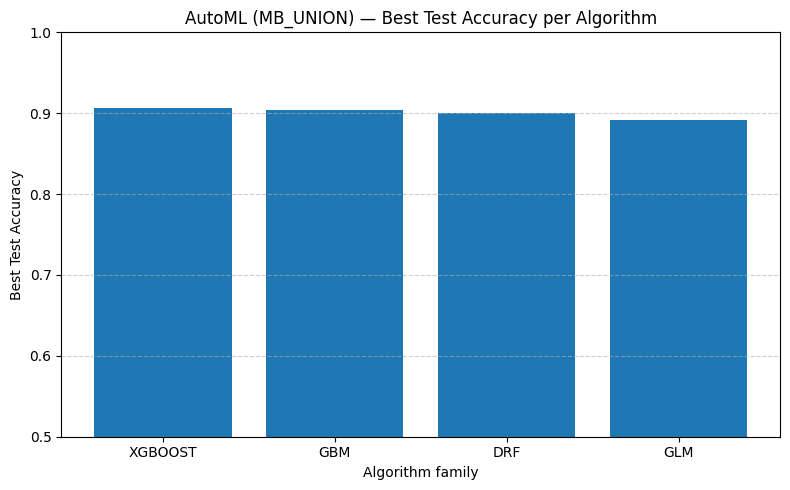

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import h2o

lb_df = aml_union.leaderboard.as_data_frame()

rows = []
for model_id in lb_df["model_id"]:
    m = h2o.get_model(model_id)
    algo = m.algo
    perf_m = m.model_performance(test_data=test_u)
    acc_list = perf_m.accuracy()
    if acc_list:
        best_acc = max(a[1] for a in acc_list)
        rows.append({"algo": algo.upper(), "model_id": model_id, "test_accuracy": best_acc})

per_model_acc_union = pd.DataFrame(rows)

best_by_algo_union = (
    per_model_acc_union
    .groupby("algo", as_index=False)["test_accuracy"]
    .max()
    .sort_values("test_accuracy", ascending=False)
)

display(best_by_algo_union)

plt.figure(figsize=(8, 5))
plt.bar(best_by_algo_union["algo"], best_by_algo_union["test_accuracy"])
plt.ylim(0.5, 1.0)
plt.ylabel("Best Test Accuracy")
plt.xlabel("Algorithm family")
plt.title("AutoML (MB_UNION) — Best Test Accuracy per Algorithm")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


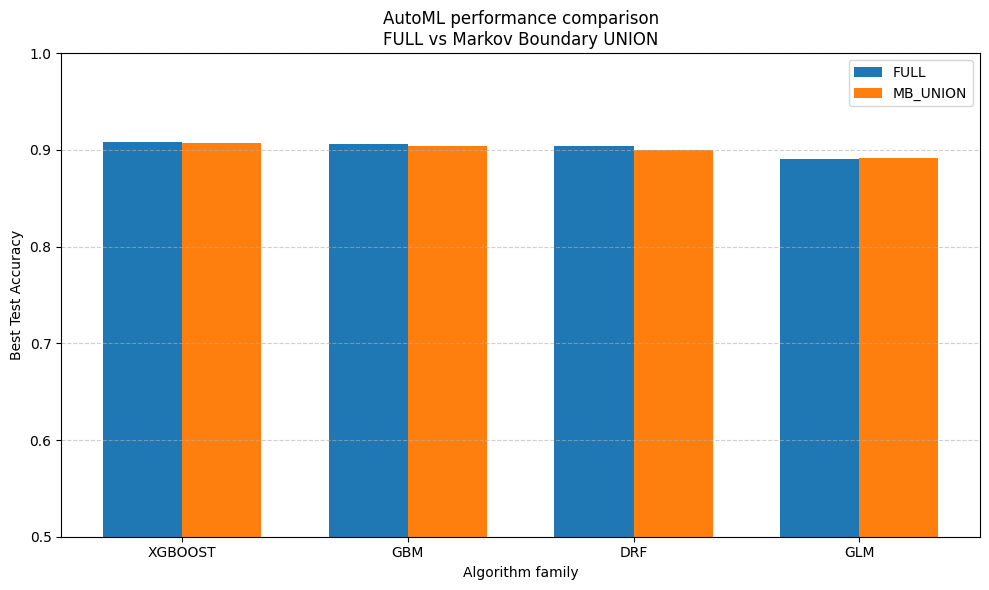

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_full = best_by_algo.copy()
df_full["dataset"] = "FULL"

df_union = best_by_algo_union.copy()
df_union["dataset"] = "MB_UNION"

results_cmp = pd.concat([df_full, df_union], ignore_index=True)

algos = results_cmp["algo"].unique()
datasets = ["FULL", "MB_UNION"]

x = np.arange(len(algos))
width = 0.35

colors = {
    "FULL": "#1f77b4",      # bleu
    "MB_UNION": "#ff7f0e"   # orange
}

plt.figure(figsize=(10, 6))

for i, ds in enumerate(datasets):
    acc = (
        results_cmp[results_cmp["dataset"] == ds]
        .set_index("algo")
        .loc[algos]["test_accuracy"]
    )
    plt.bar(x + i * width, acc, width, label=ds, color=colors[ds])

plt.xticks(x + width / 2, algos)
plt.ylabel("Best Test Accuracy")
plt.xlabel("Algorithm family")
plt.title("AutoML performance comparison\nFULL vs Markov Boundary UNION")
plt.ylim(0.5, 1.0)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


##**Ajout de LiNGAM, comparaison finale entre tous les algorithmes**

In [ ]:
# 1. Dtypes de chaque variable
df3.dtypes


,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


In [ ]:
# Variables non continues
non_continuous_cols = df3.columns[
    ~df3.dtypes.isin(['float64', 'float32'])
]

print("Variables NON continues :")
for col in non_continuous_cols:
    print(f"- {col} ({df3[col].dtype})")


Variables NON continues :
- Administrative (int64)
- Informational (int64)
- ProductRelated (int64)
- Month (object)
- OperatingSystems (int64)
- Browser (int64)
- Region (int64)
- TrafficType (int64)
- VisitorType (object)
- Weekend (bool)
- Revenue (bool)


In [ ]:
for col in non_continuous_cols:
    print(f"\n{col} ({df3[col].dtype})")
    print(df3[col].value_counts().head())



Administrative (int64)
Administrative
0    5768
1    1354
2    1114
3     915
4     765
Name: count, dtype: int64

Informational (int64)
Informational
0    9699
1    1041
2     728
3     380
4     222
Name: count, dtype: int64

ProductRelated (int64)
ProductRelated
1    622
2    465
3    458
4    404
6    396
Name: count, dtype: int64

Month (object)
Month
May    3364
Nov    2998
Mar    1907
Dec    1727
Oct     549
Name: count, dtype: int64

OperatingSystems (int64)
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
Name: count, dtype: int64

Browser (int64)
Browser
2    7961
1    2462
4     736
5     467
6     174
Name: count, dtype: int64

Region (int64)
Region
1    4780
3    2403
4    1182
2    1136
6     805
Name: count, dtype: int64

TrafficType (int64)
TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
Name: count, dtype: int64

VisitorType (object)
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: 

In [ ]:
import numpy as np

# Copie
df_lingam = df3.copy()

# Bool → int
df_lingam[['Weekend', 'Revenue']] = df_lingam[['Weekend', 'Revenue']].astype(int)

# Colonnes catégorielles à retirer
cat_cols = [
    'Month',
    'VisitorType',
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType'
]

df_lingam = df_lingam.drop(columns=cat_cols)

print(df_lingam.shape)
df_lingam.head()


(12330, 12)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,0


In [ ]:
!pip install lingam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 10.9 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=a1f404eed880c7cf8bc7e0dc79fcaa217e99f4e58e97d1745e7f228c1f54dd8a
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [ ]:

import numpy as np
import pandas as pd

from lingam import DirectLiNGAM
from lingam.utils import make_dot

#LiNGAM
X = df_lingam.to_numpy()
cols = df_lingam.columns.tolist()

model = DirectLiNGAM()
model.fit(X)

B = model.adjacency_matrix_

dot = make_dot(B, labels=cols)
dot

# Sauvegarde PNG
dot.format = "png"
dot.render("lingam_onlineshoppers_causal_graph", cleanup=True)

print("PNG généré: lingam_onlineshoppers_causal_graph.png")


✅ PNG généré: lingam_onlineshoppers_causal_graph.png


In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML


df3 = pd.read_csv("/content/online_shoppers_intention.csv")
target = "Revenue"

# Markov Blanket LiNGAM
mb_lingam = [
    "SpecialDay", "Weekend", "BounceRates", "PageValues",
    "ProductRelated", "Administrative", "ExitRates", "Informational_Duration"
]


df_mb_lingam = df3[mb_lingam + [target]].copy()

# H2O
h2o.init()
hf_mb_lingam = h2o.H2OFrame(df_mb_lingam)

hf_mb_lingam[target] = hf_mb_lingam[target].asfactor()
x_mb_lingam = [c for c in hf_mb_lingam.columns if c != target]

# split identique
train_mb_lingam, valid_mb_lingam, test_mb_lingam = hf_mb_lingam.split_frame(
    ratios=[0.7, 0.15],
    seed=42
)

aml_mb_lingam = H2OAutoML(
    max_runtime_secs=300,
    seed=42,
    sort_metric="AUC",
    balance_classes=True,
    include_algos=["GLM", "GBM", "DRF", "XGBoost"],
)

aml_mb_lingam.train(
    x=x_mb_lingam,
    y=target,
    training_frame=train_mb_lingam,
    validation_frame=valid_mb_lingam
)

# leaderboard
lb_lingam = aml_mb_lingam.leaderboard
print(lb_lingam.head(20))

# perf leader
leader_lingam = aml_mb_lingam.leader
perf_lingam = leader_lingam.model_performance(test_data=test_mb_lingam)

# métriques
acc_max = max(a[1] for a in perf_lingam.accuracy())
prec_max = max(p[1] for p in perf_lingam.precision())
f1_max = max(f[1] for f in perf_lingam.F1())

print("Leader algo:", leader_lingam.algo)
print("AUC test:", perf_lingam.auc())
print("LogLoss test:", perf_lingam.logloss())
print("Best Accuracy:", acc_max)
print("Best Precision:", prec_max)
print("F1 max:", f1_max)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.17" 2025-10-21; OpenJDK Runtime Environment (build 17.0.17+10-Ubuntu-122.04); OpenJDK 64-Bit Server VM (build 17.0.17+10-Ubuntu-122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.12/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpk6ou1ye7
  JVM stdout: /tmp/tmpk6ou1ye7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpk6ou1ye7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_vgallz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.168 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:27:47.698: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                               auc    logloss     aucpr    mean_per_class_error      rmse        mse
XGBoost_grid_1_AutoML_1_20260113_132747_model_7   0.903695   0.250445  0.702905                0.181975  0.272416  0.0742104
XGBoost_grid_1_AutoML_1_20260113_132747_model_5   0.902915   0.250688  0.700156                0.164931  0.273409  0.0747527
XGBoost_grid_1_AutoML_1_20260113_132747_model_1   0.902636   0.251359  0.703312                0.164047  0.272936  0.0744942
GBM_1_AutoML_1_20260113_132747      

/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,algo,test_accuracy
3,XGBOOST,0.905391
1,GBM,0.904840
0,DRF,0.901540
2,GLM,0.888889


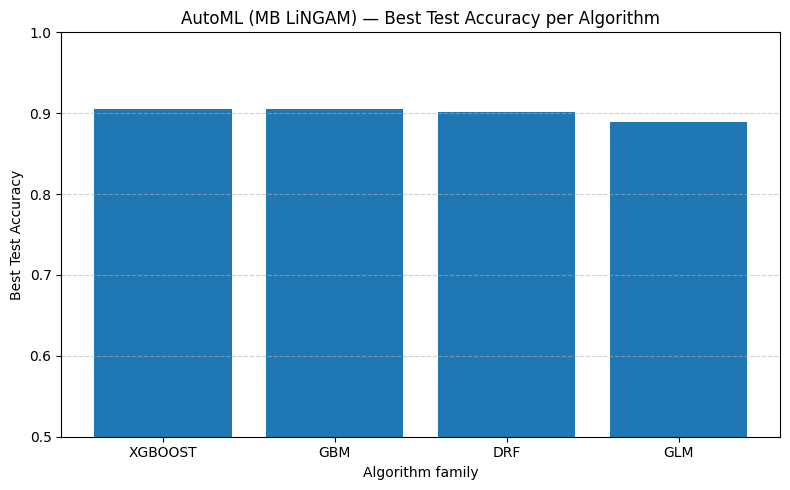

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import h2o

# --- Leaderboard ---
lb_df = aml_mb_lingam.leaderboard.as_data_frame()

rows = []
for model_id in lb_df["model_id"]:
    m = h2o.get_model(model_id)
    algo = m.algo.upper()

    perf_m = m.model_performance(test_data=test_mb_lingam)
    acc_list = perf_m.accuracy()

    if acc_list:
        best_acc = max(a[1] for a in acc_list)
        rows.append({
            "algo": algo,
            "model_id": model_id,
            "test_accuracy": best_acc
        })

# Toutes les accuracies par modèle
per_model_acc_lingam = pd.DataFrame(rows)

# Meilleure accuracy par famille d'algo
best_by_algo_lingam = (
    per_model_acc_lingam
    .groupby("algo", as_index=False)["test_accuracy"]
    .max()
    .sort_values("test_accuracy", ascending=False)
)

display(best_by_algo_lingam)

# --- Histogramme ---
plt.figure(figsize=(8, 5))
plt.bar(best_by_algo_lingam["algo"], best_by_algo_lingam["test_accuracy"])
plt.ylim(0.5, 1.0)
plt.ylabel("Best Test Accuracy")
plt.xlabel("Algorithm family")
plt.title("AutoML (MB LiNGAM) — Best Test Accuracy per Algorithm")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def best_metric_over_thresholds(perf, metric_name):
    arr = getattr(perf, metric_name)()
    return max(v[1] for v in arr)

# FULL (aml, test)
perf_full = aml.leader.model_performance(test_data=test)

# PC (aml_mb_pc, test_mb)
perf_pc = aml_mb_pc.leader.model_performance(test_data=test_mb)

# HC (aml_mb_hc, test_mb_hc)
perf_hc = aml_mb_hc.leader.model_performance(test_data=test_mb_hc)

# LiNGAM (aml_mb_lingam, test_mb_lingam)
perf_ling = aml_mb_lingam.leader.model_performance(test_data=test_mb_lingam)

summary = pd.DataFrame([
    {"dataset": "FULL",
     "Accuracy": best_metric_over_thresholds(perf_full, "accuracy"),
     "F1": best_metric_over_thresholds(perf_full, "F1")},
    {"dataset": "MB_PC",
     "Accuracy": best_metric_over_thresholds(perf_pc, "accuracy"),
     "F1": best_metric_over_thresholds(perf_pc, "F1")},
    {"dataset": "MB_HC",
     "Accuracy": best_metric_over_thresholds(perf_hc, "accuracy"),
     "F1": best_metric_over_thresholds(perf_hc, "F1")},
    {"dataset": "MB_LiNGAM",
     "Accuracy": best_metric_over_thresholds(perf_ling, "accuracy"),
     "F1": best_metric_over_thresholds(perf_ling, "F1")},
])

display(summary)


,dataset,Accuracy,F1
0,FULL,0.900990,0.666667
1,MB_PC,0.897140,0.668977
2,MB_HC,0.847635,0.380497
3,MB_LiNGAM,0.903740,0.652241


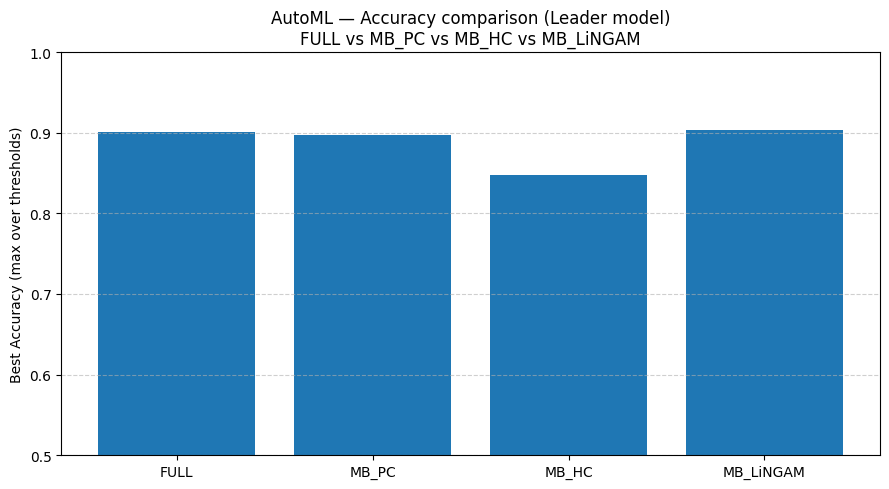

In [ ]:
plt.figure(figsize=(9,5))
plt.bar(summary["dataset"], summary["Accuracy"])
plt.ylim(0.5, 1.0)
plt.ylabel("Best Accuracy (max over thresholds)")
plt.title("AutoML — Accuracy comparison (Leader model)\nFULL vs MB_PC vs MB_HC vs MB_LiNGAM")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import h2o

def extract_best_metrics_by_algo(aml, test, label):
    lb = aml.leaderboard.as_data_frame()
    rows = []

    for model_id in lb["model_id"]:
        m = h2o.get_model(model_id)
        algo = m.algo.upper()

        perf = m.model_performance(test_data=test)

        acc = max(a[1] for a in perf.accuracy())
        f1  = max(f[1] for f in perf.F1())

        rows.append({
            "algo": algo,
            "dataset": label,
            "accuracy": acc,
            "f1": f1
        })

    df = pd.DataFrame(rows)

    # garder le meilleur modèle par algo
    return (
        df.groupby(["dataset", "algo"], as_index=False)
          .agg({"accuracy": "max", "f1": "max"})
    )


In [ ]:
df_full   = extract_best_metrics_by_algo(aml, test, "FULL")
df_pc     = extract_best_metrics_by_algo(aml_mb_pc, test_mb, "MB_PC")
df_hc     = extract_best_metrics_by_algo(aml_mb_hc, test_mb_hc, "MB_HC")
df_lingam = extract_best_metrics_by_algo(aml_mb_lingam, test_mb_lingam, "MB_LiNGAM")

results_all = pd.concat([df_full, df_pc, df_hc, df_lingam], ignore_index=True)
display(results_all)


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow a

,dataset,algo,accuracy,f1
0,FULL,DRF,0.904290,0.664506
1,FULL,GBM,0.905941,0.692857
2,FULL,GLM,0.890539,0.627575
3,FULL,XGBOOST,0.908141,0.692042
4,MB_PC,DRF,0.896040,0.619765
5,MB_PC,GBM,0.905941,0.673469
6,MB_PC,GLM,0.889439,0.624573
7,MB_PC,XGBOOST,0.903740,0.683544
8,MB_HC,DRF,0.848735,0.370436
9,MB_HC,GBM,0.850385,0.395376


##**Graphique de la comparaison des algorithmes en terme d'accuracy**

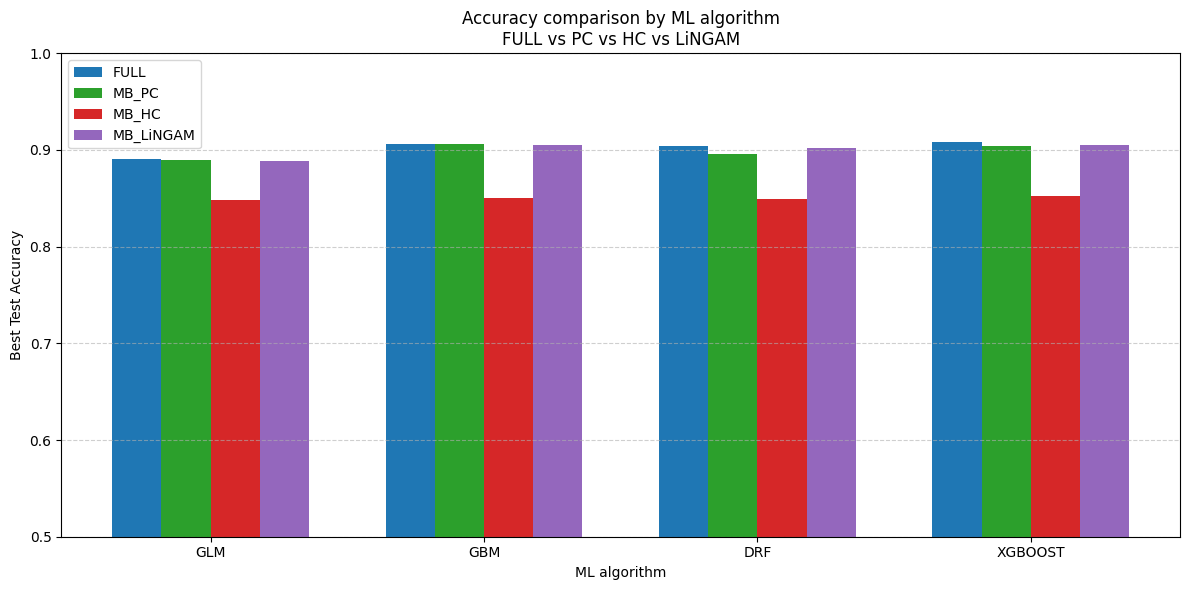

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

algos = ["GLM", "GBM", "DRF", "XGBOOST"]
datasets = ["FULL", "MB_PC", "MB_HC", "MB_LiNGAM"]

x = np.arange(len(algos))
width = 0.18

colors = {
    "FULL": "#1f77b4",
    "MB_PC": "#2ca02c",
    "MB_HC": "#d62728",
    "MB_LiNGAM": "#9467bd"
}

plt.figure(figsize=(12, 6))

for i, ds in enumerate(datasets):
    acc = (
        results_all[results_all["dataset"] == ds]
        .set_index("algo")
        .loc[algos]["accuracy"]
    )
    plt.bar(x + i * width, acc, width, label=ds, color=colors[ds])

plt.xticks(x + 1.5 * width, algos)
plt.ylabel("Best Test Accuracy")
plt.xlabel("ML algorithm")
plt.title("Accuracy comparison by ML algorithm\nFULL vs PC vs HC vs LiNGAM")
plt.ylim(0.5, 1.0)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


##**Graphique de la comparaison des algorithmes en terme de F1-Score**

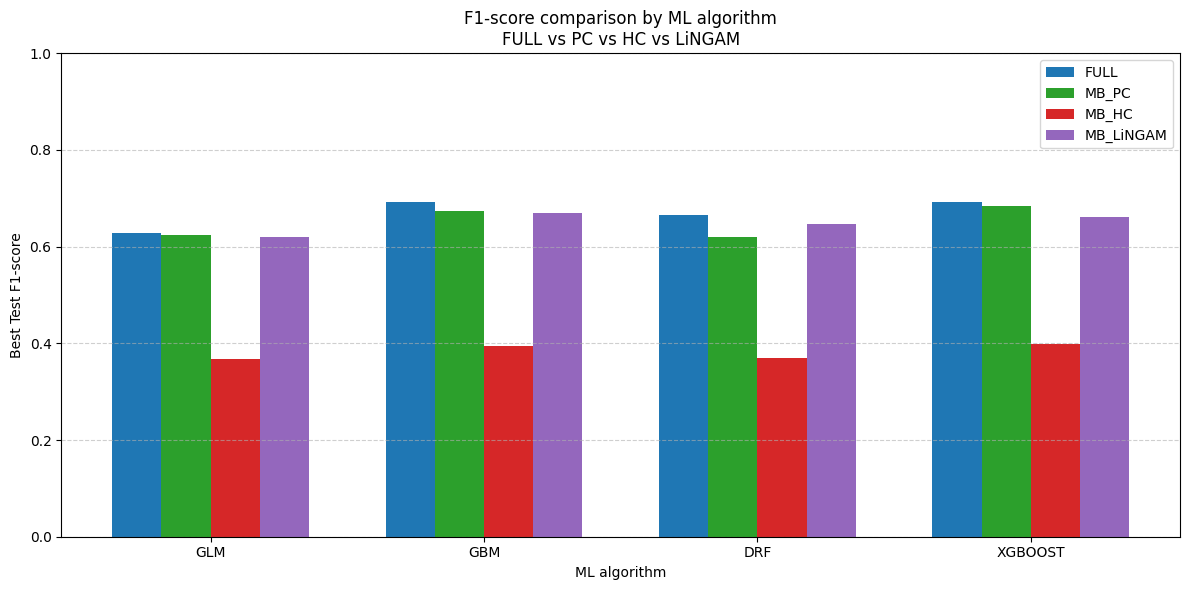

In [ ]:
plt.figure(figsize=(12, 6))

for i, ds in enumerate(datasets):
    f1 = (
        results_all[results_all["dataset"] == ds]
        .set_index("algo")
        .loc[algos]["f1"]
    )
    plt.bar(x + i * width, f1, width, label=ds, color=colors[ds])

plt.xticks(x + 1.5 * width, algos)
plt.ylabel("Best Test F1-score")
plt.xlabel("ML algorithm")
plt.title("F1-score comparison by ML algorithm\nFULL vs PC vs HC vs LiNGAM")
plt.ylim(0.0, 1.0)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


##**Test SUP**

In [ ]:
import pandas as pd

path = "/content/application_train.csv"
df = pd.read_csv(path)

print(df.shape)
df.head()


(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Test non concluant, code supprimé**